Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [75]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
#### Load the movies dataset 
movies_df = pd.read_csv('movies.csv')
print(movies_df.head(10))

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
5  258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
6  260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
7  280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
8  250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
9  250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            homepage      id  \
0                        http://www.avatarmovie.com/   19995   
1       http://disney.go.com/disneypictures/pirates/     285   
2        http://www.sonypictures.com/movies/spectre/  206647   
3     

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']` from the data set as they will not be used in the analysis.

In [77]:
# List of columns to be removed
unused_columns = ['homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'status', 'tagline']

# Drop columns
movies_df = movies_df.drop(columns=unused_columns)
print(movies_df.head(10))

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   
5  258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...     559   
6  260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   38757   
7  280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   99861   
8  250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     767   
9  250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  209112   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.08261

#### Remove any duplicate rows

In [78]:
# Remove duplicates
movies_df = movies_df.drop_duplicates()

#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [79]:
# Discard entries with 0 budget or 0 revenue.
movies_df = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into `DateTime` format and extract the year from the date. This will help us in analysing yearly data.

In [80]:
# Change the release_date column to DateTime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Extract the release year from every release date
movies_df['release_date'] = movies_df['release_date'].dt.year

Change budget and revenue columns to a integer data type using numpy’s `int64` method.

In [81]:
# Change budget and revenue columns to integer data type
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

On checking the dataset, we see that `genres`, `production_countries`, `spoken_languages` are in the JSON format which will make it difficult to manipulate the dataframe. The `parse_col_json function` flattens these columns into a format that can be easily interpreted.

In [82]:
# Convert from JSON format to a list of strings
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index, movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index, column] = str(list1)
    
# Flatten data in columns
parse_col_json('genres', 'name')
parse_col_json('production_countries', 'name')
parse_col_json('spoken_languages', 'name')


In [83]:
# Inspect flattened data
movies_df.sample(1)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
709,60000000,['Drama'],38167,28.800112,['United States of America'],2010,204594016,133.0,"['Português', 'English', 'Italiano']",Eat Pray Love,5.8,636


### Finding Certain Genres
Locate all movies in the "Action" genre. 

In [84]:
# Create a dataframe with all the movies in the "Action" genre
action_movies = movies_df[movies_df['genres'].str.contains('Action', na=False)]
print(action_movies)

         budget                                             genres      id  \
0     237000000  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   19995   
1     300000000                 ['Adventure', 'Fantasy', 'Action']     285   
2     245000000                   ['Action', 'Adventure', 'Crime']  206647   
3     250000000           ['Action', 'Crime', 'Drama', 'Thriller']   49026   
4     260000000         ['Action', 'Adventure', 'Science Fiction']   49529   
...         ...                                                ...     ...   
4664     230000                       ['Drama', 'Action', 'Crime']   18533   
4670     400000  ['Adventure', 'Action', 'Thriller', 'Science F...    9659   
4701     150000                     ['Action', 'Drama', 'Romance']    5822   
4772      31192                      ['Drama', 'Action', 'Comedy']   42151   
4798     220000                    ['Action', 'Crime', 'Thriller']    9367   

      popularity                            production_countrie

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive movies? 

How do the most expensive and cheapest movies compare? Exploring the most expensive movies highlights if some movies are worth the money spent on them based on their performance and revenue generated.

Most expensive movies

In [88]:
# Identify the 5 most expensive movies
print("expensive movies")
most_expensive_movies = movies_df.sort_values(by='budget', ascending=False).head(5)
print(most_expensive_movies[['title', 'budget', 'revenue']])

# Identify the 5 cheapest movies
print("cheapest movies")
cheapest_movies = movies_df.sort_values(by='budget', ascending=True).head(5)
print(cheapest_movies[['title', 'budget', 'revenue']])

expensive movies
                                          title     budget     revenue
17  Pirates of the Caribbean: On Stranger Tides  380000000  1045713802
1      Pirates of the Caribbean: At World's End  300000000   961000000
7                       Avengers: Age of Ultron  280000000  1405403694
10                             Superman Returns  270000000   391081192
4                                   John Carter  260000000   284139100
cheapest movies
                   title  budget  revenue
4238        Modern Times       1  8500000
3611  A Farewell to Arms       4       25
3372        Split Second       7        5
3419        Bran Nue Dae       7        7
4608        The Prophecy       8       16


Compare the most expensive and cheapest movies.

C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\2824382652.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='budget', data=comparison_df, palette='viridis')


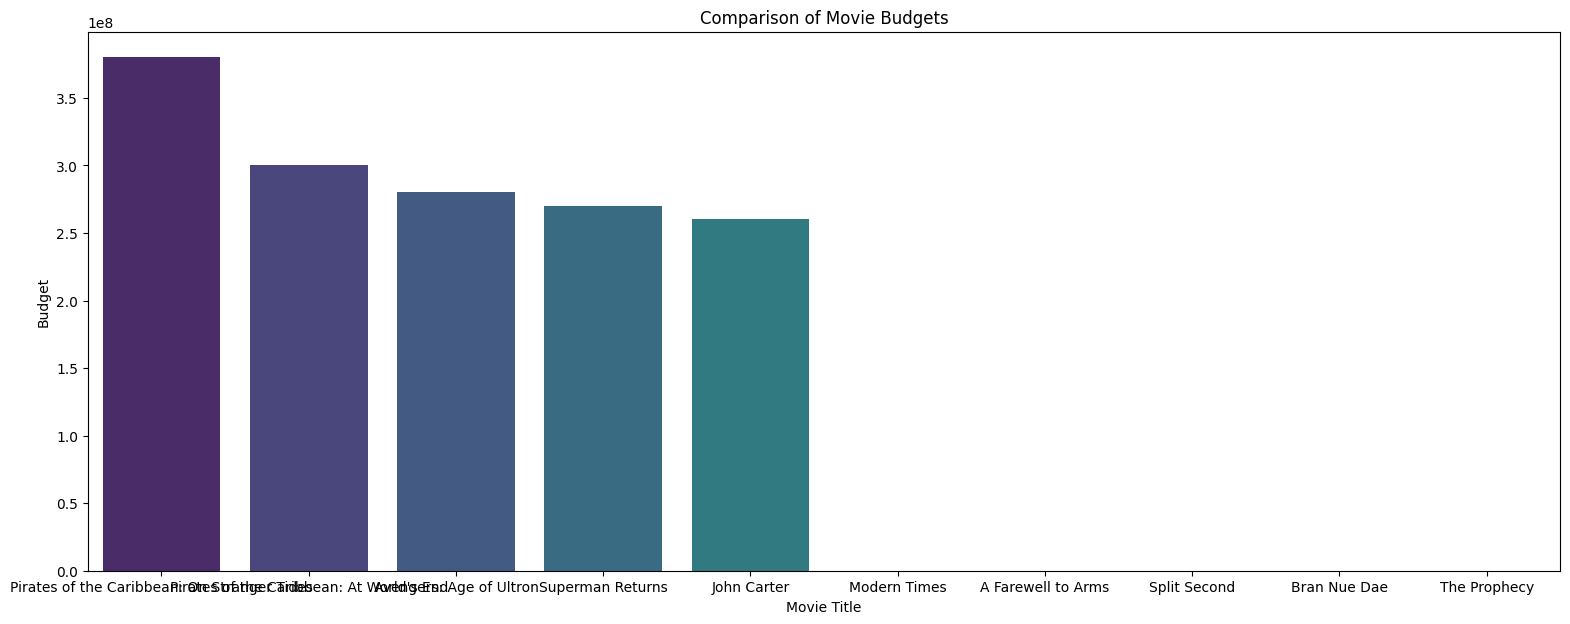

C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\2824382652.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='revenue', data=comparison_df, palette='viridis')


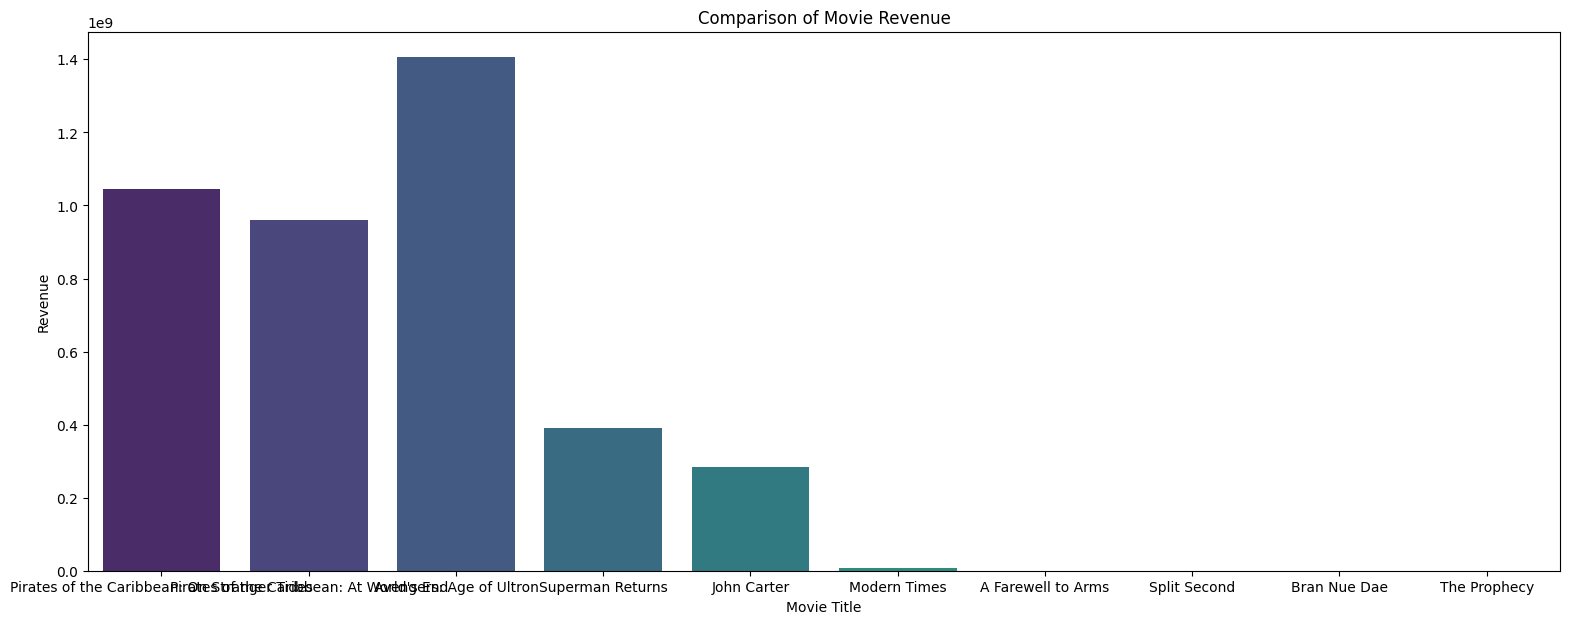

In [93]:
# Combine the most expensive and cheapes movies for comparison.
comparison_df = pd.concat([most_expensive_movies, cheapest_movies])

plt.figure(figsize=(19, 7))
sns.barplot(x='title', y='budget', data=comparison_df, palette='viridis')
plt.title('Comparison of Movie Budgets')
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.show()

plt.figure(figsize=(19, 7))
sns.barplot(x='title', y='revenue', data=comparison_df, palette='viridis')
plt.title('Comparison of Movie Revenue')
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.show()

**Findings:**

Pirates of the Caribbean: On Stranger Tides and Avengers: Age of Ultron, had high budgets and they also generated very high revenue. Modern Times had a very low budget but was able to generate high revenue. Superman Returns and John by generated a revenue below the budget.

#### What are the top 5 most profitable movies? 

Compare the min and max profits. The comparison helps us identify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [92]:
# Calculate profite
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Identify the top 5 most profitable movies
print("most profitable movies")
most_profitable_movies = movies_df.sort_values(by='profit', ascending=False).head(5)
print(most_profitable_movies[['title', 'budget', 'revenue', 'profit']])

# Identify the least profitable movies.
print("least profitable movies.")
least_profitable_movies = movies_df.sort_values(by='profit', ascending=True).head(5)
print(least_profitable_movies[['title', 'budget', 'revenue', 'profit']])

most profitable movies
             title     budget     revenue      profit
0           Avatar  237000000  2787965087  2550965087
25         Titanic  200000000  1845034188  1645034188
28  Jurassic World  150000000  1513528810  1363528810
44       Furious 7  190000000  1506249360  1316249360
16    The Avengers  220000000  1519557910  1299557910
least profitable movies.
                            title     budget   revenue     profit
13                The Lone Ranger  255000000  89289910 -165710090
338                     The Alamo  145000000  25819961 -119180039
141               Mars Needs Moms  150000000  38992758 -111007242
208              The 13th Warrior  160000000  61698899  -98301101
311  The Adventures of Pluto Nash  100000000   7103973  -92896027


C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\866362816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='profit', data=comparison_df, palette='viridis')


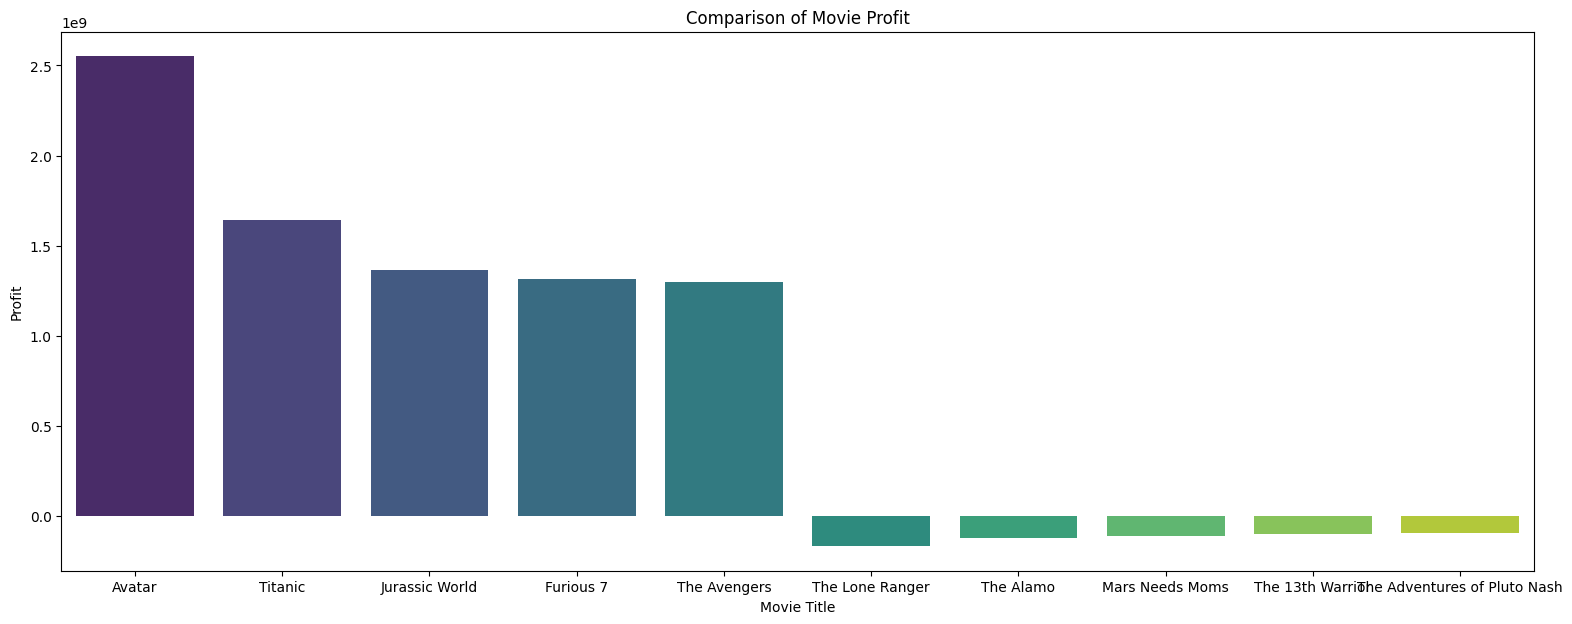

In [94]:
comparison_df = pd.concat([most_profitable_movies, least_profitable_movies])

plt.figure(figsize=(19, 7))
sns.barplot(x='title', y='profit', data=comparison_df, palette='viridis')
plt.title('Comparison of Movie Profit')
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.show()

**Findings:**

High budget does not always garantes high profit. The Lone Ranger was one of the movies with a very high budget but they also had a very high loss.

#### Find the most popular movies. 
Sort the dataframe based on the popularity column.

                       title  popularity
546                  Minions  875.581305
95              Interstellar  724.247784
788                 Deadpool  514.569956
94   Guardians of the Galaxy  481.098624
127       Mad Max: Fury Road  434.278564


C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\4183282810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='popularity', data=most_popular_movies, palette='viridis')


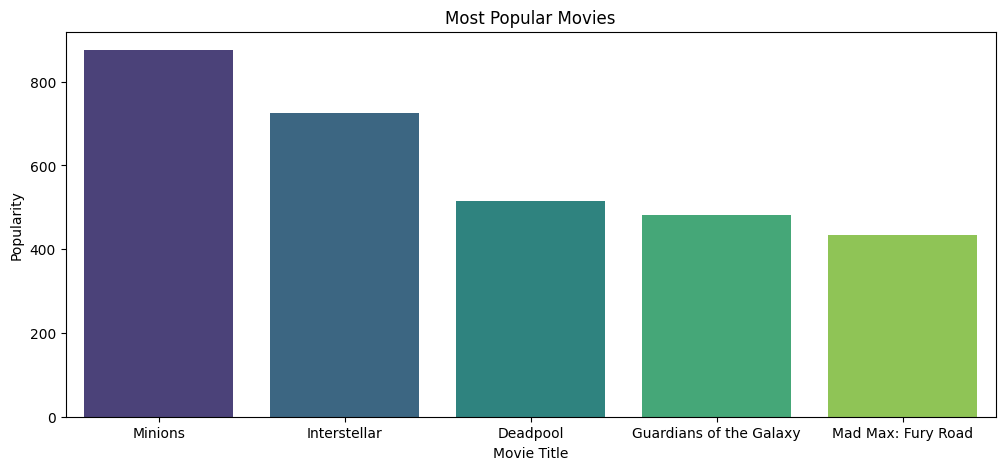

In [102]:
# Sort the DataFrame based on the popularity column
most_popular_movies = movies_df.sort_values(by='popularity', ascending=False).head(5)
print(most_popular_movies[['title', 'popularity']])

plt.figure(figsize=(12, 5))
sns.barplot(x='title', y='popularity', data=most_popular_movies, palette='viridis')
plt.title('Most Popular Movies')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.show()

**Findings**

Minions had a high popularity above 800, followed by Interstellar with the popularity around 725. Mad Max: Fury Road had a popularity just above 400 but was also ranked together with most popular movies.

#### Find Movies which are rated above 7

                                    title  vote_average
0                                  Avatar           7.2
3                   The Dark Knight Rises           7.6
6                                 Tangled           7.4
7                 Avengers: Age of Ultron           7.3
8  Harry Potter and the Half-Blood Prince           7.4


C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\3349722723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='vote_average', data=highly_rated, palette='viridis')


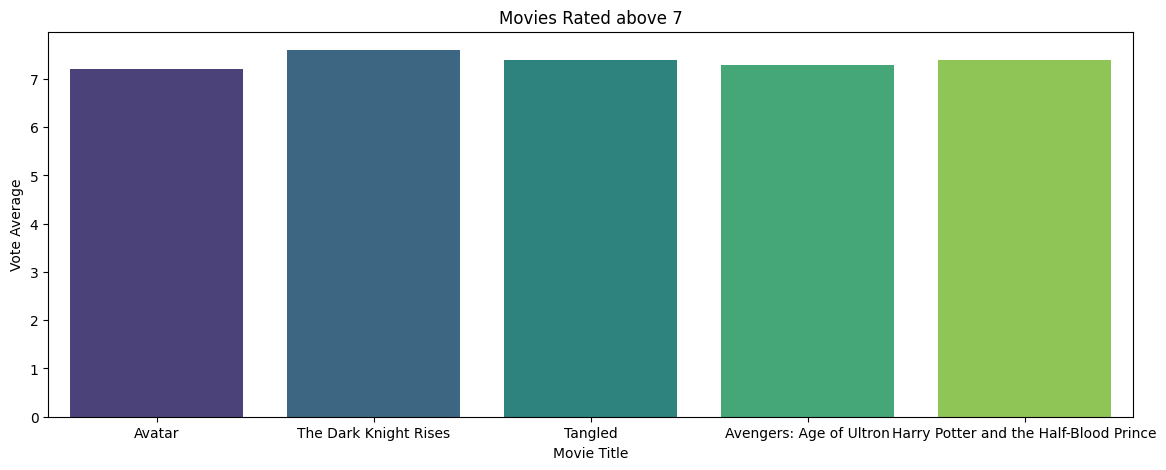

In [103]:
# Find movies with rating above 7
highly_rated = movies_df[movies_df['vote_average'] > 7].head(5)
print(highly_rated[['title', 'vote_average']])

plt.figure(figsize=(14, 5))
sns.barplot(x='title', y='vote_average', data=highly_rated, palette='viridis')
plt.title('Movies Rated above 7')
plt.xlabel('Movie Title')
plt.ylabel('Vote Average')
plt.show()

**Findings:**

The above graph shows the top 5 movies rated above 7, with The Dark Night Rises being the highest rated movie at 7.6 rating.

#### Most successful genres 
Create a bar plot explaining the frequency of movies in each genre.

genres
['Drama']                204
['Comedy']               197
['Drama', 'Romance']      96
['Comedy', 'Romance']     87
['Comedy', 'Drama']       70
Name: count, dtype: int64


C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\3948624352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


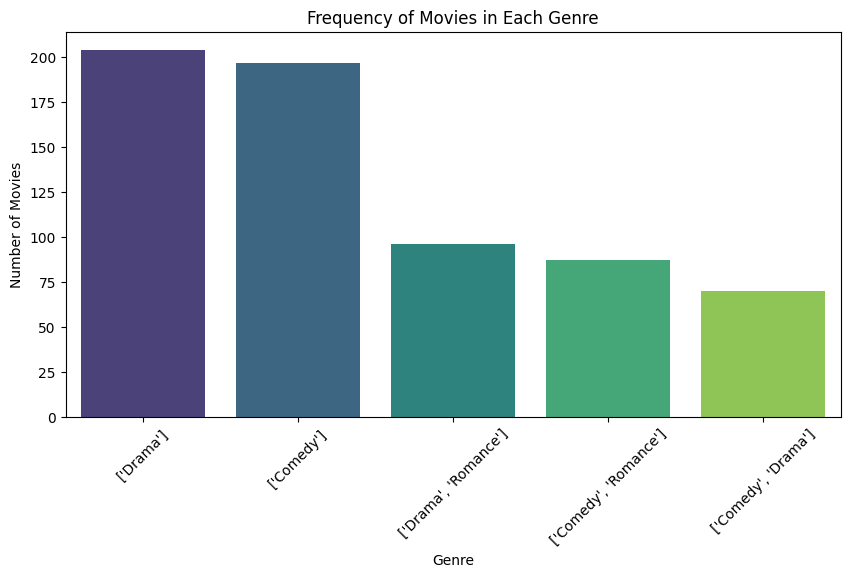

In [107]:
 # Split the genre and count the frequency of each genre
genre_counts = movies_df['genres'].str.split('|').explode().value_counts().head()
print(genre_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Frequency of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

**Findings:**

The genre with most frequency is drama with 204, followed closely by comedy with the frequency of 197.

# Generate three different interesting visualisations with a data story.

**Average Revenue Over Time**

C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\2035827978.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=average_revenue, x='release_date', y='revenue', palette='viridis')


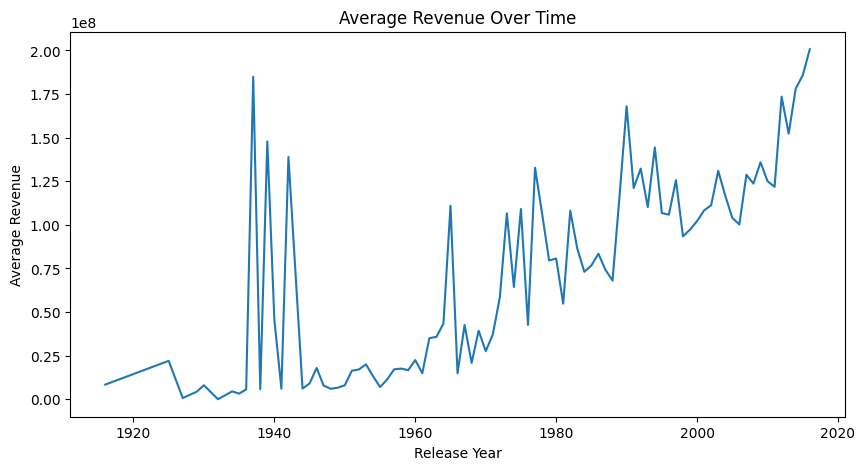

In [104]:
# Calculate the average revenue for each year.
average_revenue = movies_df.groupby('release_date')['revenue'].mean().reset_index()

# Create a line plot for the average revenue over time.
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_revenue, x='release_date', y='revenue', palette='viridis')
plt.title('Average Revenue Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.show()

The above line plot shows the average revenue for the movies over the years, it makes it easy to understand trends in movie earnings. From the plot we can tell the revenue was high around 1940.

__Average Profit Over Time__

C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\353276283.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=average_profit, x='release_date', y='profit', palette='viridis')


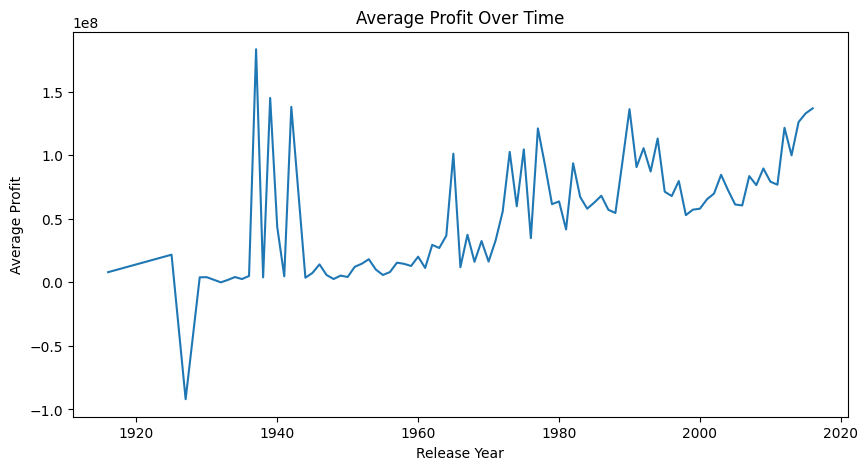

In [105]:
# calculate the average profit for each year
average_profit = movies_df.groupby('release_date')['profit'].mean().reset_index()

# Create a line plot for the average profit over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_profit, x='release_date', y='profit', palette='viridis')
plt.title('Average Profit Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Profit')
plt.show()

The above line plot shows the average profit for movies over the years, helping us understand treads in movie profitability. From the plot we can tell the profit have been on the increase from after 1940.

**Average Budget Over Time**

C:\Users\skhum\AppData\Local\Temp\ipykernel_4532\1736307075.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=average_profit, x='release_date', y='budget', palette='viridis')


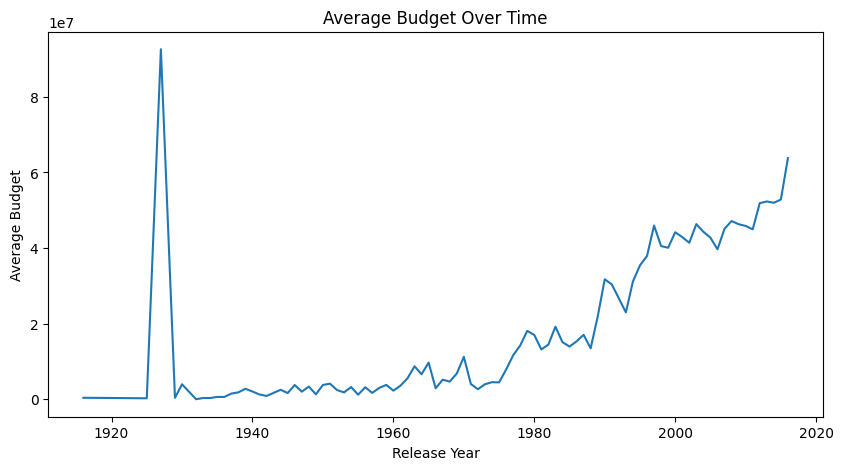

In [106]:
# Calculate the average budget for each year
average_profit = movies_df.groupby('release_date')['budget'].mean().reset_index()

# Create a line plot for the average budget over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=average_profit, x='release_date', y='budget', palette='viridis')
plt.title('Average Budget Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Budget')
plt.show()

This line plot shows the average budget for the movies over the years, it helps us understand trends in movie production costs. Production costs started to rise around 1980.